   x_n       y_n
0  0.0  1.000000
1  0.5  0.812500
2  1.0  0.888350
3  1.5  1.069166
4  2.0  1.269255
5  2.5  1.455861
6  3.0  1.623571
   x_n       y_n
0  0.0  1.000000
1  0.5  0.765433
2  1.0  0.834280
3  1.5  1.029696
4  2.0  1.251695
5  2.5  1.454936
6  3.0  1.632094


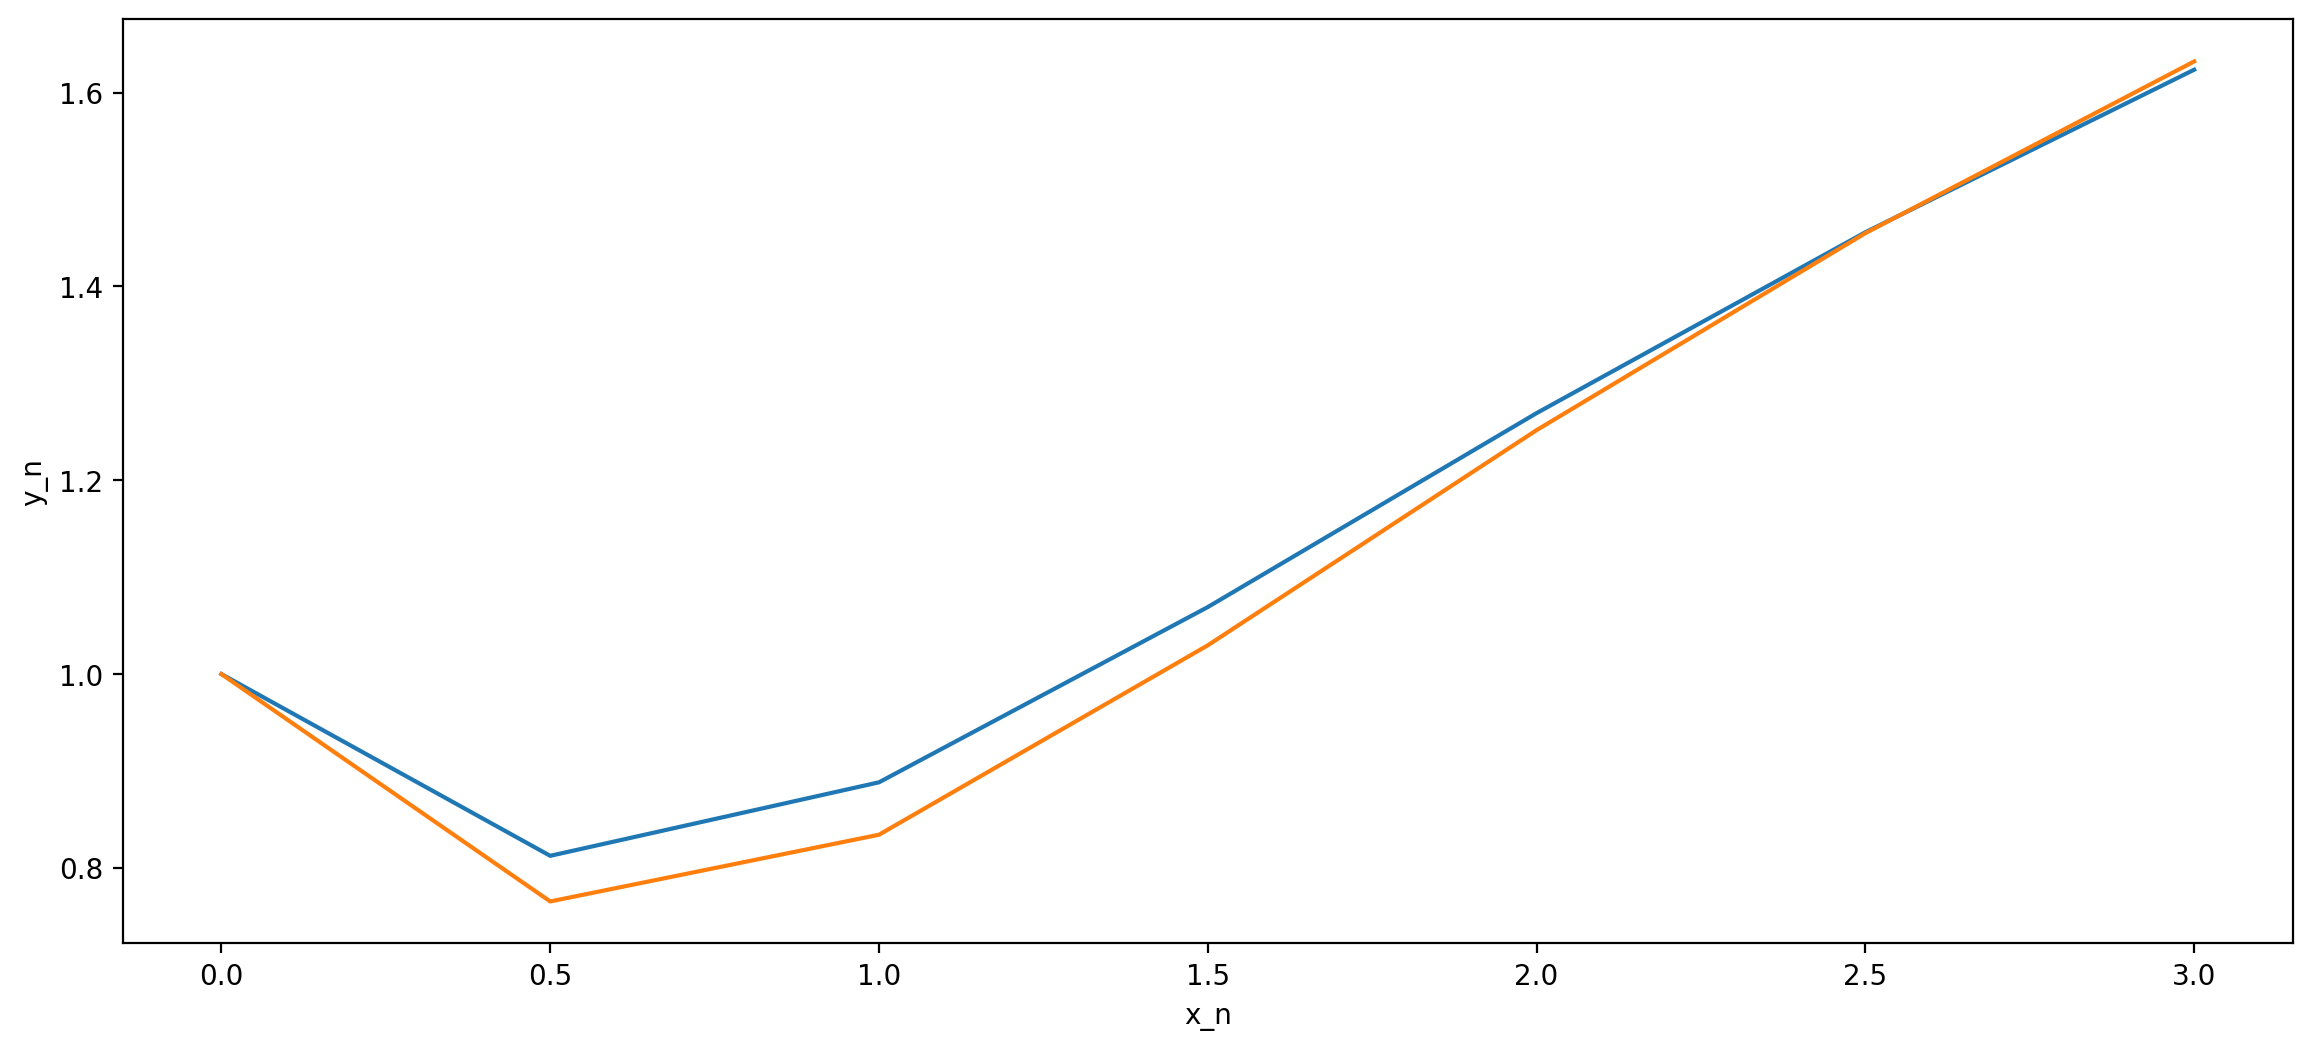

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sympy import symbols
x, y = symbols("x, y", real = True)

class ODE_Interpolation() :
    def __init__(self, function = None) :
        self.fx = function
    
    def change_function(self, function) :
        return self.__init__(function)

    def ImprovedEuler(self, y_0, h, interval) :
        euler_df = pd.DataFrame({"x_n" : [interval[0]],
                                "y_n" : [y_0]})
        round = int((interval[1] - interval[0])/h)
        for n in range(round) :
            y_c = euler_df["y_n"][n]
            x_n = euler_df["x_n"][0] + (h * n)
            x_n_1 = euler_df["x_n"][0] + (h * (n+1))

            f_n = (self.fx).evalf(subs = {x : x_n, y : y_c})
            y_p = y_c + h*(f_n)

            f_n_1 = (self.fx).evalf(subs = {x : x_n_1, y : y_p})
            y_n = float(y_c + (h/2)*(f_n + f_n_1))

            new_row = pd.DataFrame({"x_n" : [x_n_1], "y_n" : [y_n]})
            euler_df = pd.concat([euler_df, new_row], ignore_index = True)
        return euler_df
    
    def RungeKutta_4(self, y_0, h, interval) :
        runge_df = pd.DataFrame({"x_n" : [interval[0]],
                                 "y_n" : [y_0]})
        round = int((interval[1] - interval[0])/h)
        for n in range(round) :
            y_n = runge_df["y_n"][n]
            x_n = runge_df["x_n"][0] + (h * n)
            
            k_1 = h*((self.fx).evalf(subs = {x : x_n, y : y_n}))
            k_2 = h*((self.fx).evalf(subs = {x : (x_n + h/2), y : (y_n + k_1/2)}))
            k_3 = h*((self.fx).evalf(subs = {x : (x_n + h/2), y : (y_n + k_2/2)}))
            k_4 = h*((self.fx).evalf(subs = {x : (x_n + h), y : (y_n + k_3)}))
            y_new = float(y_n + (k_1 + (2*k_2) + (2*k_3) + k_4)/6)

            new_row = pd.DataFrame({"x_n" : [x_n + h], "y_n" : [y_new]})
            runge_df = pd.concat([runge_df, new_row], ignore_index = True)
        return runge_df

fx = x - y**2
ode = ODE_Interpolation(fx)
euler_df = ode.ImprovedEuler(1, 0.5, [0,3])
runge_df = ode.RungeKutta_4(1, 0.5, [0,3])

print(euler_df)
print(runge_df)
plt.figure(figsize = (14,6), dpi = 200)
sns.lineplot(x = "x_n", y = "y_n", data = euler_df);
sns.lineplot(x = "x_n", y = "y_n", data = runge_df);